/tmp/ipykernel_81965/3492027928.py:82: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


Heatmap saved to /home/hp/nayanika/github/GPX6/figures/salt_bridge_heatmap_humansec.png


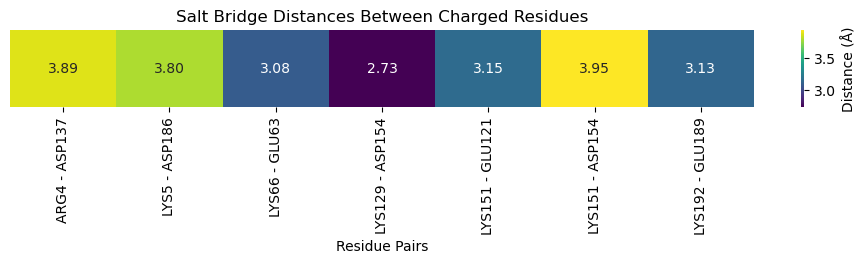

In [12]:
from Bio.PDB import PDBParser
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def find_salt_bridges(pdb_file, cutoff=4.0):
    """
    Identify ion pairs and salt bridges between oppositely charged residues.
    
    Parameters:
    pdb_file (str): Path to the PDB file.
    cutoff (float): Distance cutoff for identifying salt bridges in Angstroms.
    
    Returns:
    list: List of dictionaries containing pairs of residues in salt bridges.
    """
    # Initialize PDB parser
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)
    
    # Define charged residues and their charged atoms
    positively_charged = {'LYS': 'NZ', 'ARG': 'NH1', 'HIS': 'ND1'}
    negatively_charged = {'ASP': 'OD1', 'GLU': 'OE1'}
    
    # List to store identified salt bridges
    salt_bridges = []
    
    # Loop over all chains and residues to find salt bridges
    for chain in structure[0]:
        for pos_res in chain:
            if pos_res.resname in positively_charged:
                pos_atom = pos_res[positively_charged[pos_res.resname]]
                
                for neg_res in chain:
                    if neg_res == pos_res or neg_res.resname not in negatively_charged:
                        continue
                    neg_atom = neg_res[negatively_charged[neg_res.resname]]
                    
                    # Calculate distance between charged atoms
                    distance = pos_atom - neg_atom
                    if distance <= cutoff:
                        salt_bridges.append({
                            'pos_res': f"{pos_res.resname}{pos_res.id[1]}",
                            'neg_res': f"{neg_res.resname}{neg_res.id[1]}",
                            'chain': chain.id,
                            'distance': round(distance, 2)
                        })
    
    return salt_bridges

def plot_salt_bridges_heatmap(salt_bridges, save_path=None):
    """
    Plot and optionally save a heatmap showing distances between residues in salt bridges.
    
    Parameters:
    salt_bridges (list): List of salt bridges with position and distance information.
    save_path (str, optional): Path to save the heatmap image. Defaults to None.
    """
    if not salt_bridges:
        print("No salt bridges found to plot")
        return
    
    # Prepare data for heatmap
    residue_pairs = [f"{bridge['pos_res']} - {bridge['neg_res']}" for bridge in salt_bridges]
    distances = [bridge['distance'] for bridge in salt_bridges]
    
    # Create a DataFrame for the heatmap
    data = pd.DataFrame({'Residue_Pairs': residue_pairs, 'Distance': distances})
    data.set_index('Residue_Pairs', inplace=True)
    
    # Since we have a single column, pivot for display as a 2D array
    heatmap_data = pd.DataFrame(data['Distance']).T  # Transpose for single row
    
    # Plot heatmap
    plt.figure(figsize=(12, 1))  # Adjust height for single row
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Distance (Å)'})
    plt.title("Salt Bridge Distances Between Charged Residues")
    plt.xlabel("Residue Pairs")
    plt.yticks([], [])  # Hide y-axis as we have only one row
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    # Save plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Heatmap saved to {save_path}")
    
    plt.show()

# Specify the PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_humansec.pdb"

# Find salt bridges
salt_bridges = find_salt_bridges(pdb_file)

# Specify the save path for the heatmap image
save_path = "/home/hp/nayanika/github/GPX6/figures/salt_bridge_heatmap_humansec.png"

# Plot and save the heatmap
plot_salt_bridges_heatmap(salt_bridges, save_path=save_path)
